In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from content_based_filtering.helpers.dataloader import load_users, load_movies, load_ratings
from config import *

# Load data

In [109]:
users = load_users(USERS)
movies = load_movies(MOVIES)
ratings = load_ratings(RATINGS)

# Describe the data

### Users

In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6040 entries, 0 to 6039
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gender      6040 non-null   object
 1   age         6040 non-null   int64 
 2   occupation  6040 non-null   int64 
 3   zip_code    6040 non-null   object
dtypes: int64(2), object(2)
memory usage: 235.9+ KB


In [20]:
users.dropna()

,gender,age,occupation,zip_code
user_id,,,,
0,F,1,10,48067
1,M,56,16,70072
2,M,25,15,55117
3,M,45,7,02460
4,M,25,20,55455
...,...,...,...,...
6035,F,25,15,32603
6036,F,45,1,76006
6037,F,56,1,14706


There is no missing value.

In [110]:
users.head()

,gender,age,occupation,zip_code,generalized_zip_code
user_id,,,,,
0,F,1,10,48067,480
1,M,56,16,70072,700
2,M,25,15,55117,551
3,M,45,7,02460,024
4,M,25,20,55455,554


In [111]:
for column in users:
    print(column, " : ", users[column].unique())

gender  :  ['F' 'M']
age  :  [ 1 56 25 45 50 35 18]
occupation  :  [10 16 15  7 20  9  1 12 17  0  3 14  4 11  8 19  2 18  5 13  6]
zip_code  :  ['48067' '70072' '55117' ... '78734' '76006' '14706']
generalized_zip_code  :  ['480' '700' '551' '024' '554' '068' '114' '616' '953' '040' '327' '933'
 '601' '229' '206' '958' '993' '537' '900' '100' '016' '231' '191' '146'
 '334' '193' '021' '941' '662' '022' '618' '105' '151' '245' '606' '980'
 '756' '943' '921' '770' '981' '722' '969' '567' '553' '604' '303' '721'
 '951' '549' '558' '577' '950' '945' '017' '153' '493' '483' '946' '531'
 '949' '544' '857' '076' '442' '286' '982' '780' '335' '954' '333' '208'
 '009' '902' '791' '631' '920' '908' '972' '370' '837' '280' '557' '223'
 '775' '271' '752' '672' '913' '379' '201' '500' '065' '997' '550' '200'
 '212' '787' '222' '454' '620' '640' '294' '190' '109' '292' '850' '481'
 '515' '074' '145' '128' '287' '130' '931' '985' '928' '469' '070' '452'
 '540' '331' '030' '144' '917' '940' '799' '60

In [52]:
users["age"].describe().map('{: .2f}'.format)

count     6040.00
mean        30.64
std         12.90
min          1.00
25%         25.00
50%         25.00
75%         35.00
max         56.00
Name: age, dtype: object

In [28]:
unique_age = users["age"].unique()
unique_age

array([ 1, 56, 25, 45, 50, 35, 18])

In [42]:
users["gender"].value_counts()

M    4331
F    1709
Name: gender, dtype: int64

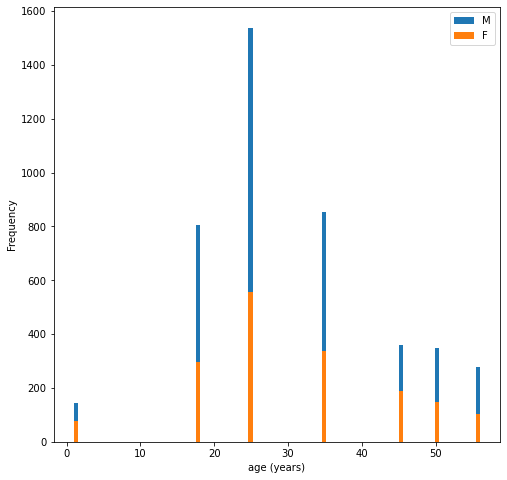

In [41]:
plt.figure(figsize=(8,8))
plt.xlabel("age (years)")
users[users["gender"] == "M"]["age"].plot.hist(bins=100, label="M")
users[users["gender"] == "F"]["age"].plot.hist(bins=100, label="F")
plt.legend();

### Movies

In [43]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 0 to 3882
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        3883 non-null   object
 1   year         3883 non-null   int64 
 2   Animation    3883 non-null   int8  
 3   Children's   3883 non-null   int8  
 4   Comedy       3883 non-null   int8  
 5   Adventure    3883 non-null   int8  
 6   Fantasy      3883 non-null   int8  
 7   Romance      3883 non-null   int8  
 8   Drama        3883 non-null   int8  
 9   Action       3883 non-null   int8  
 10  Crime        3883 non-null   int8  
 11  Thriller     3883 non-null   int8  
 12  Horror       3883 non-null   int8  
 13  Sci-Fi       3883 non-null   int8  
 14  Documentary  3883 non-null   int8  
 15  War          3883 non-null   int8  
 16  Musical      3883 non-null   int8  
 17  Mystery      3883 non-null   int8  
 18  Film-Noir    3883 non-null   int8  
 19  Western      3883 non-null 

In [44]:
movies.dropna()

,title,year,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
movie_id,,,,,,,,,,,,,,,,,,,,
0,Toy Story,1995,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Jumanji,1995,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men,1995,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Waiting to Exhale,1995,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Father of the Bride Part II,1995,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,Meet the Parents,2000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,Requiem for a Dream,2000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3880,Tigerland,2000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


There is no missing value.

In [46]:
movies.head()

,title,year,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
movie_id,,,,,,,,,,,,,,,,,,,,
0,Toy Story,1995,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Jumanji,1995,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men,1995,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Waiting to Exhale,1995,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Father of the Bride Part II,1995,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
movies.mean().map('{: .2f}'.format)

year            1986.07
Animation          0.03
Children's         0.06
Comedy             0.31
Adventure          0.07
Fantasy            0.02
Romance            0.12
Drama              0.41
Action             0.13
Crime              0.05
Thriller           0.13
Horror             0.09
Sci-Fi             0.07
Documentary        0.03
War                0.04
Musical            0.03
Mystery            0.03
Film-Noir          0.01
Western            0.02
dtype: object

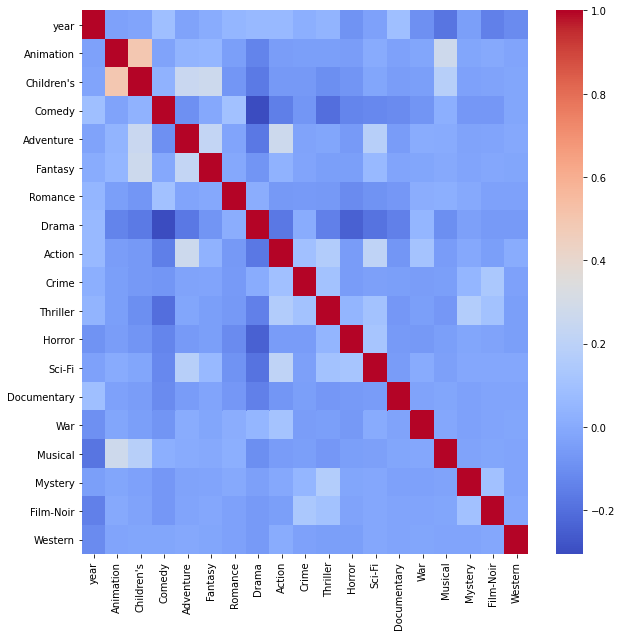

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(movies.corr(), cmap="coolwarm");

Animation and children are correlated. Otherwise, it's not possible to bring other insights between categories.

### Ratings

In [61]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


In [62]:
ratings.head()

,user_id,movie_id,rating
0,0,1176,5
1,0,655,3
2,0,902,3
3,0,3339,4
4,0,2286,5


In [64]:
ratings.shape

(1000209, 3)

In [65]:
ratings.dropna().shape

(1000209, 3)

There is no missing value.

In [63]:
ratings["rating"].mean()

3.581564453029317

In average, movies are not very well rated.

In [73]:
ratings.groupby("user_id").apply(lambda x : len(x)).sort_values()

user_id
946       20
4067      20
2529      20
340       20
5257      20
        ... 
1180    1521
1940    1595
4276    1743
1679    1850
4168    2314
Length: 6040, dtype: int64

In [75]:
ratings.groupby("user_id").apply(lambda x : len(x)).mean()

165.5975165562914

Woah. In average, people have made 165 movie reviews !

In [86]:
reviews_with_categories = movies.drop(["title", "year"], axis=1).merge(ratings, left_index=True, right_on="movie_id")
reviews_with_categories = reviews_with_categories.drop(["user_id", "movie_id"], axis=1)
reviews_with_categories

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,rating
40,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
469,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
581,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
711,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
837,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964309,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,4
967122,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,3
968244,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,4
982282,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [99]:
mean_rate_per_category = []
for column in reviews_with_categories.columns[:-1]:
    mean_rate_per_category.append(reviews_with_categories[reviews_with_categories[column] == 1]["rating"].mean())

pd.DataFrame(index=reviews_with_categories.columns[:-1], data=mean_rate_per_category, columns=["Mean rate"])

,Mean rate
Animation,3.684868
Children's,3.422035
Comedy,3.522099
Adventure,3.477257
Fantasy,3.447371
Romance,3.607465
Drama,3.766332
Action,3.491185
Crime,3.708679
Thriller,3.570466
